# Zadanie 1

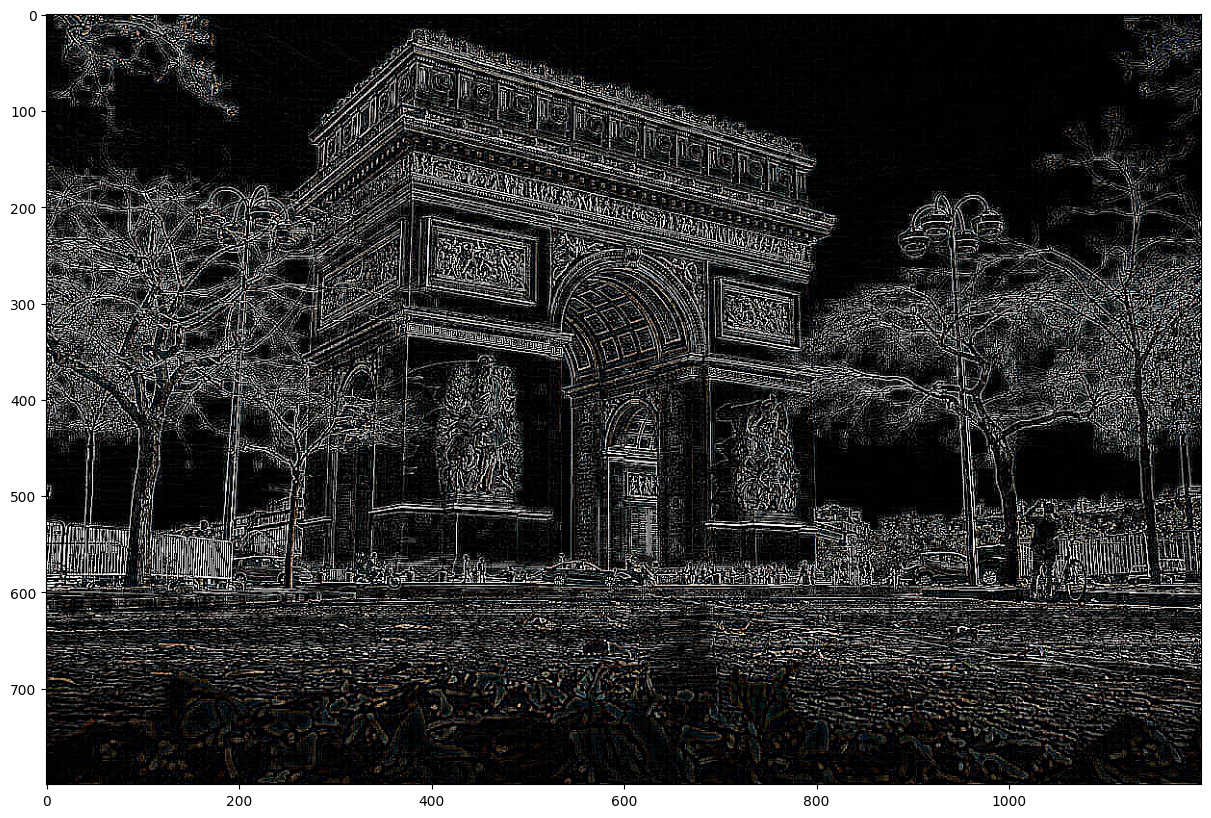

In [256]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (18, 10)

image = cv.imread('./images/example.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
kernel = [
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
]

kernel = np.asarray(kernel)
image_1 = cv.filter2D(image.copy(), -1, kernel=kernel)
plt.imshow(image_1)

# Zadanie 2

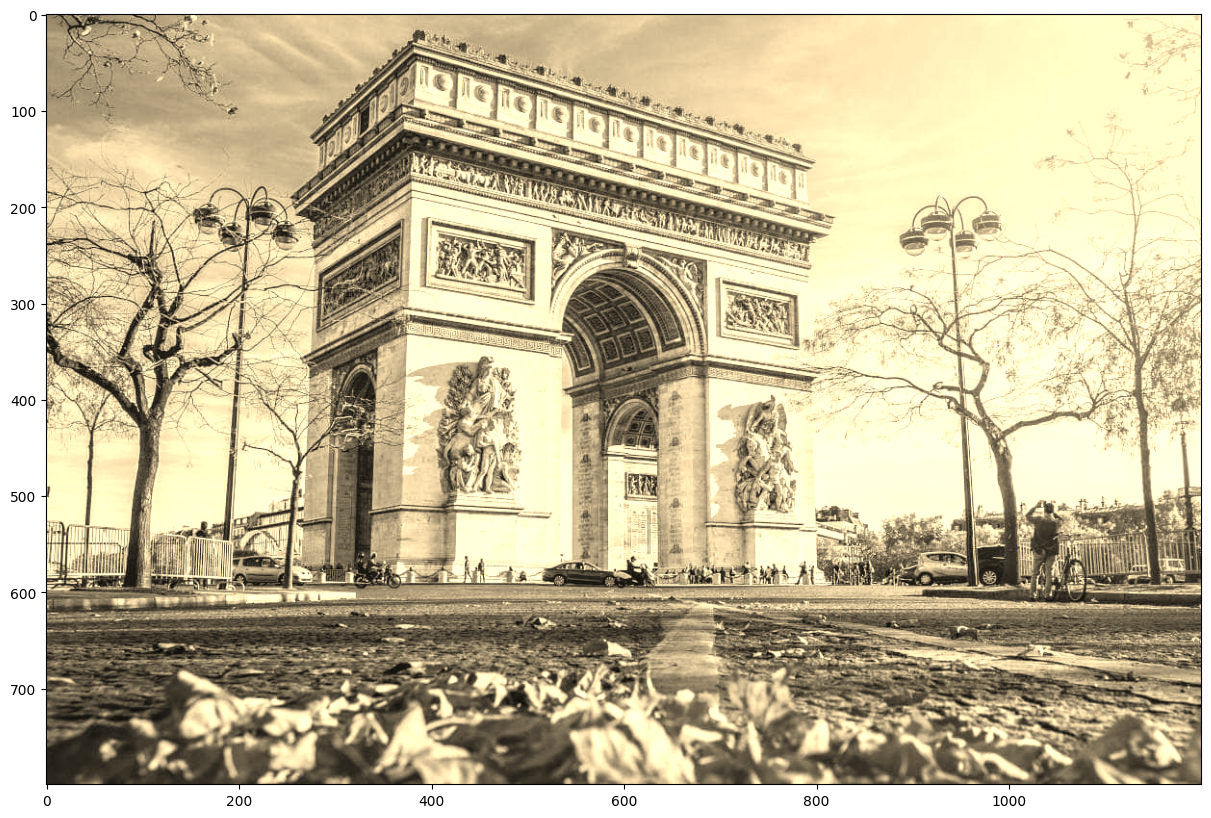

In [257]:
image_2 = image.copy()

image_2 = image_2.astype(np.float32) / 255.0

matrix = np.asarray([
    [0.393, 0.769, 0.189],
    [0.349, 0.689, 0.168],
    [0.272, 0.534, 0.131]
])

image_2 = image_2 @ matrix.T

image_2 = np.clip(image_2, 0, 1)

plt.imshow(image_2)


# Zadanie 3

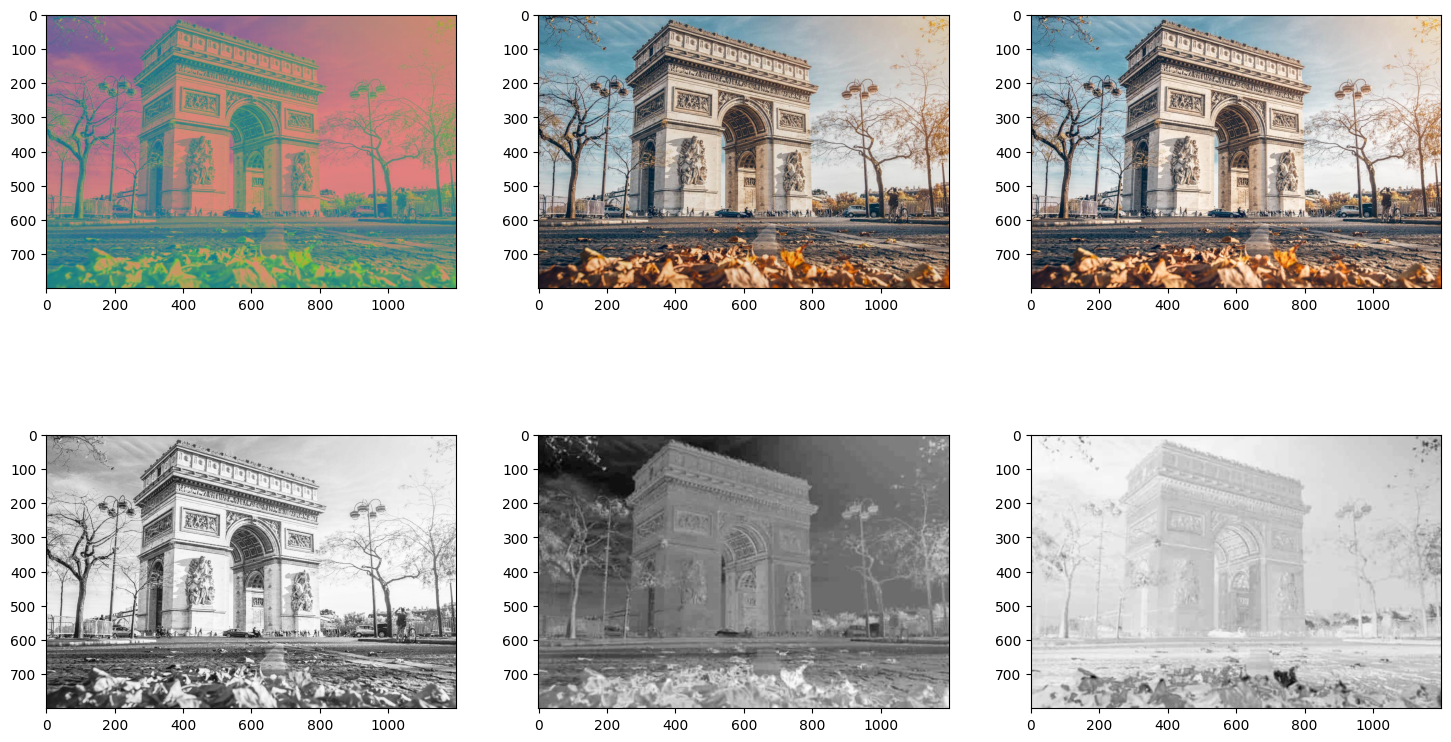

In [264]:
image_3 = image.copy()

matrix = np.asarray([
    [0.229, 0.587, 0.114],
    [0.500, -0.418, -0.082],
    [-0.168, -0.331, 0.500]
])

image_3 = np.asarray([0, 128, 128]) + (image_3 @ matrix.T)
image_3 = image_3.astype(np.uint8)
image_3 = np.clip(image_3, 0, 255)

converted = cv.cvtColor(image_3, cv.COLOR_YCrCb2RGB)

fig, ax = plt.subplots(2, 3)

ax[0][0].imshow(image_3)
ax[0][1].imshow(converted)
ax[0][2].imshow(image)
ax[1][0].imshow(image_3[:, :, 0], cmap="Greys_r")
ax[1][1].imshow(image_3[:, :, 1], cmap="Greys_r")
ax[1][2].imshow(image_3[:, :, 2], cmap="Greys_r")

# Zadanie 4

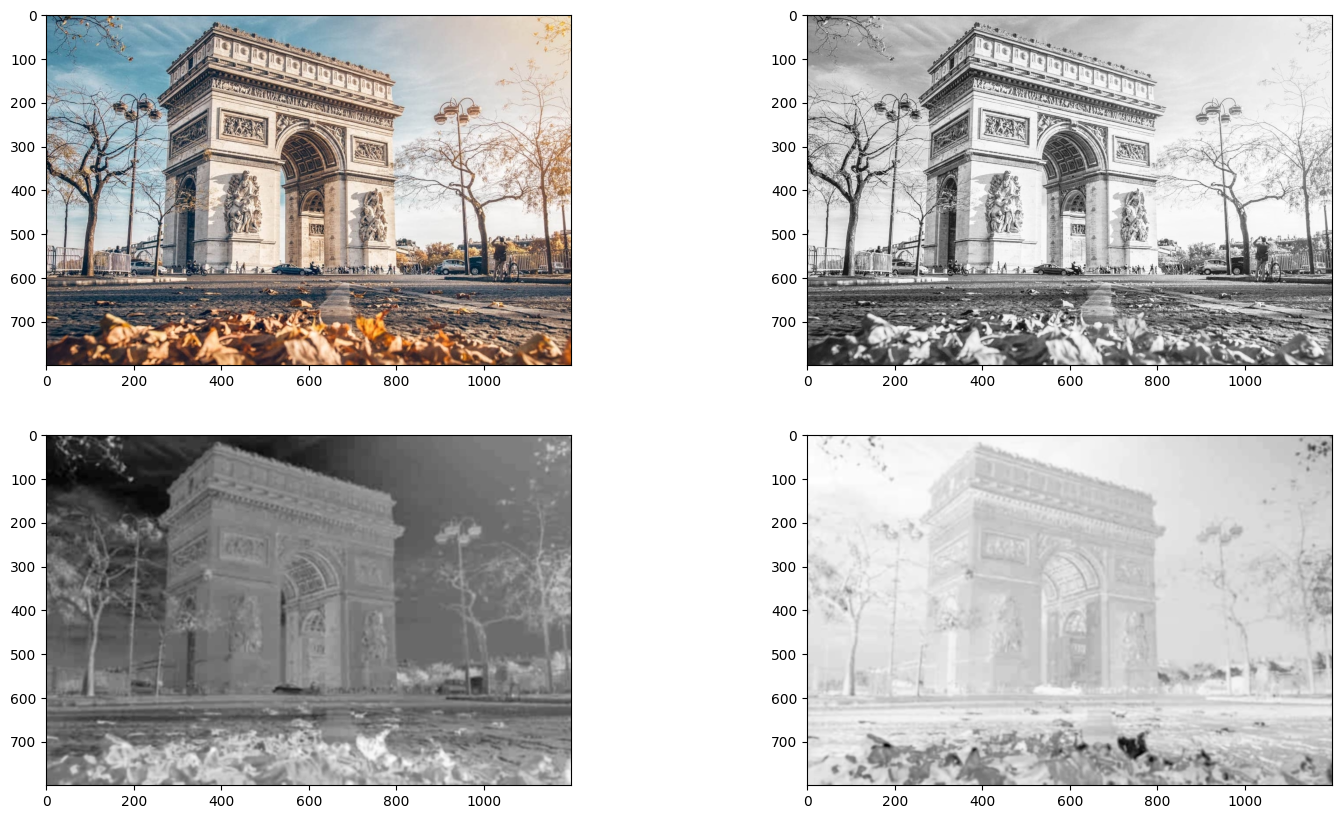

In [259]:
rows, cols, channels = image.shape

image_4 = cv.cvtColor(image, cv.COLOR_RGB2YCrCb)

cr = image_4[:, :, 1]
cr = cv.pyrDown(cr, dstsize=(cols // 2, rows // 2))
cr = cv.pyrUp(cr, dstsize=(cols, rows))

cb = image_4[:, :, 2]
cb = cv.pyrDown(cb, dstsize=(cols // 2, rows // 2))
cb = cv.pyrUp(cb, dstsize=(cols, rows))


new_image_4 = image_4.copy()
new_image_4[:, :, 1] = cr
new_image_4[:, :, 2] = cb


new_image_4_rgb = cv.cvtColor(new_image_4, cv.COLOR_YCrCb2RGB)

fig, ax = plt.subplots(2, 2)
ax[0][0].imshow(new_image_4_rgb)
ax[0][1].imshow(new_image_4[:, :, 0], cmap="Greys_r")
ax[1][0].imshow(new_image_4[:, :, 1], cmap="Greys_r")
ax[1][1].imshow(new_image_4[:, :, 2], cmap="Greys_r")

# Zadanie 5

In [260]:
def mse(img_1, img_2):
    w, h, c = img_1.shape
    ms =  np.sum((img_1.astype(float) - img_2.astype(float)) ** 2)
    return ms / (w * h * c)


print(mse(image, new_image_4_rgb))                

2.7060114583333332
